In [2]:
print("hello python")

hello python


In [409]:
import pandas as pd
import numpy as np

In [410]:
df = pd.read_csv("diabetes.csv")

In [411]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [413]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# AGE

In [414]:
len(df[df['Age']<65])

752

In [415]:
len(df[df['Age']>=65]['Age'])

16

In [416]:
res = []
res1 = []
lst = list(df.Age)

In [417]:
for i in lst:
    if i>65:
        res.append(i)

In [418]:
res

[69, 66, 67, 72, 81, 67, 66, 67, 66, 70, 68, 69, 66]

In [419]:
list(df[df['Age']>65]['Age'])

[69, 66, 67, 72, 81, 67, 66, 67, 66, 70, 68, 69, 66]

In [420]:
for i in lst:
    if 25 <= i < 65:
        res1.append(i)

In [421]:
len(res1)

533

In [422]:
768-16-219

533

## IMC

In [423]:
imc = list(df.BMI)

In [424]:
len(df[df["BMI"] ==0]['BMI']) #IMC = 0

11

In [425]:
len(df[df["BMI"] < 18.5]['BMI']) # IMC < 18.5

15

In [426]:
df[df["BMI"] < 18.5]['BMI'] # Maigre

9       0.0
49      0.0
60      0.0
81      0.0
145     0.0
239    18.4
371     0.0
418    18.2
426     0.0
438    18.2
494     0.0
522     0.0
526    18.2
684     0.0
706     0.0
Name: BMI, dtype: float64

In [427]:
res2 = []
res3 = []
res4 = []

In [428]:
for i in imc:
    if 18.5 <= i <= 24.9:
        res2.append(i)

In [429]:
len(res2)#Normal

102

In [430]:
for i in imc:
    if 25 <= i <= 29.9:
        res3.append(i)

In [431]:
len(res3)#Surpoids

179

In [432]:
for i in imc:
    if i >= 30:
        res4.append(i)

In [433]:
len(res4)#Obésité 

472

In [434]:
#res4

In [435]:
import plotly.graph_objects as go

In [436]:
labels = ['Maigreur', 'Normal', 'Surpoids', 'Obésité']
values = [4, 102, 179, 472]

In [437]:
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,
                             pull=[0,0,.1,0], 
                             hole=.2,
                            textinfo='label+percent',
                            textfont_size=17,
                            title="IMC")])
fig.show()

In [438]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [439]:
target = df.Outcome
inputs = df.drop('Outcome', axis='columns')

In [440]:
inputs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [441]:
inputs.Insulin.mean()

79.79947916666667

In [442]:
inputs.columns[inputs.isna().any()]#Sur quelle colonne il y a des valeurs null ou manquantes?

Index([], dtype='object')

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [445]:
len(X_train)

614

In [446]:
len(X_test)

154

In [447]:
len(inputs)

768

In [448]:
from sklearn.naive_bayes import GaussianNB

In [449]:
model = GaussianNB()

In [451]:
model.fit(X_train, y_train)

GaussianNB()

In [452]:
model.score(X_test,y_test)

0.7662337662337663

In [453]:
model.score(X_train, y_train)

0.755700325732899

In [454]:
y_pred = model.predict(X_test)

In [455]:
y_pred[:20]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [456]:
#y_test[:20]

In [457]:
#model.predict_proba(X_test[:20])

In [383]:
#Augmentation de la performance

In [384]:
from sklearn.model_selection import cross_val_score

In [385]:
cross_val_score(GaussianNB(), X_train, y_train, cv=5, scoring='accuracy')

array([0.79674797, 0.71544715, 0.73170732, 0.72357724, 0.79508197])

In [386]:
cross_val_score(GaussianNB(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.7525123284019726

In [387]:
import matplotlib.pyplot as plt 

In [388]:
from sklearn.metrics import confusion_matrix

In [458]:
cm = confusion_matrix(y_test, y_pred)

In [459]:
cm

array([[86, 21],
       [15, 32]], dtype=int64)

<AxesSubplot: >

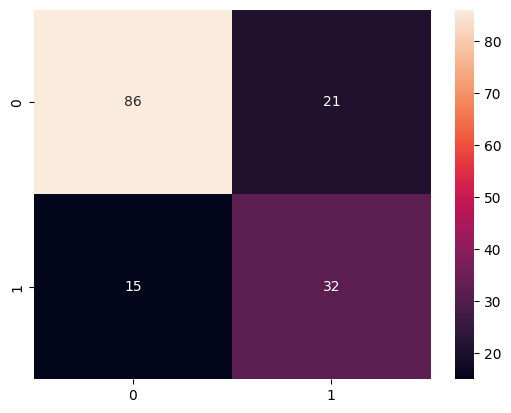

In [460]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot: >

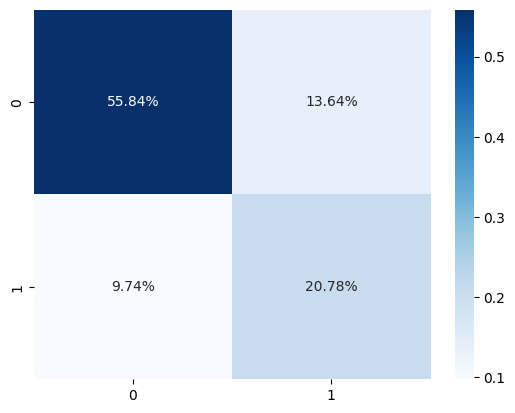

In [461]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap="Blues")

<AxesSubplot: >

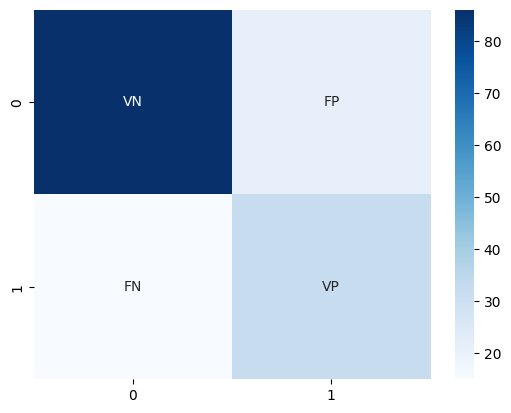

In [462]:
labels = ['VN', 'FP', 'FN','VP']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot: >

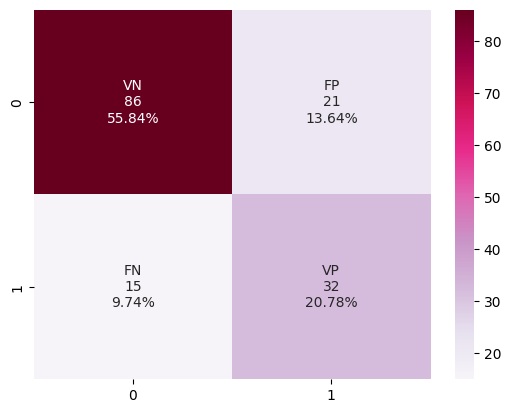

In [463]:
group_names = ['VN', 'FP', 'FN','VP']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_pourcentage = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_pourcentage)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='PuRd')

In [464]:
78/154 *100

50.649350649350644

In [465]:
#!pip install pretty-confusion-matrix

In [466]:
#pp_matrix(cm, cmap="PuRd")

In [467]:
#Traitement des valeurs manquantes

In [399]:
from sklearn.impute import SimpleImputer

In [400]:
imputer = SimpleImputer(missing_values=0, strategy='mean')
#Ici 0 est considérer con valeur manquante et nous le remplaçons par la moyenne

In [401]:
data_tranf = imputer.fit_transform(inputs)

In [402]:
len(data_tranf)

768

In [403]:
X_train_transf, X_test_transf, y_train, y_test = train_test_split(data_tranf, target, test_size=0.2)

In [404]:
model.fit(X_train_transf, y_train)

GaussianNB()

In [468]:
model.score(X_test_transf, y_test)

C:\Users\PC074\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



0.5454545454545454

In [469]:
from sklearn.metrics import classification_report

In [470]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       107
           1       0.60      0.68      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.78      0.77      0.77       154



In [471]:
#Save model

In [472]:
import pickle

In [473]:
filename = 'finalized_model.pinto'
pickle.dump(model, open(filename, 'wb'))

In [474]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test.to_numpy(), y_test)
print(result)

0.7662337662337663


C:\Users\PC074\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [475]:
print('Model score:', model.score(X_test, y_test))
pickle.dump(model, open('rfr_model.sav', 'wb'))
                                            
loaded_model = pickle.load(open('rfr_model.sav', 'rb'))                 
print('Loaded model score:', loaded_model.score(X_test, y_test))

Model score: 0.7662337662337663
Loaded model score: 0.7662337662337663


In [ ]:
#Faite attention à la transformation, car elle de l'impact sur le model enregistré